In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
# Loading data
crypto_df= pd.read_csv('crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#Search for traded currencies
IsTrading_df=crypto_df[crypto_df['IsTrading']==True]
IsTrading_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
#remove Unnamed column and seperate IsTrading column
IsTrading_df=IsTrading_df.drop('IsTrading', 1)

In [5]:
IsTrading_df=IsTrading_df.drop('Unnamed: 0', 1)

In [6]:
#drop null
IsTrading_df=IsTrading_df.dropna()
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
#Clean Data from null values
IsTrading_df=IsTrading_df.dropna()
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
#filter for TotalCoinsMined
IsTrading_df=IsTrading_df[IsTrading_df['TotalCoinsMined']>0]
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
#Convert the remaining features into numerical data
encodedColumns=['Algorithm','ProofType','CoinName']
for column in encodedColumns:
    encoder=LabelEncoder()
    IsTrading_df[column]=encoder.fit_transform(IsTrading_df[column].values)
IsTrading_df

<ipython-input-9-f5c68cbeb8e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IsTrading_df[column]=encoder.fit_transform(IsTrading_df[column].values)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,4,52,15,4.199995e+01,42
2,3,52,15,1.055185e+09,532000000
5,159,66,15,2.927942e+10,314159265359
7,55,47,12,1.792718e+07,21000000
8,171,20,12,1.076842e+08,0
...,...,...,...,...,...
1238,518,47,1,2.000000e+09,2000000000
1242,202,52,15,1.493105e+07,250000000
1245,37,10,12,9.802226e+08,1400222610
1246,229,18,12,7.296538e+06,21000000


In [10]:
#Standardize the dataset using StandardScaler()
scaler=StandardScaler()
scaled_IsTrading=scaler.fit_transform(IsTrading_df)
print(scaled_IsTrading[0:5])

[[-1.70187522e+00  3.76459118e-01  8.91356555e-01 -1.17108170e-01
  -1.52870298e-01]
 [-1.70840141e+00  3.76459118e-01  8.91356555e-01 -9.39695522e-02
  -1.45008997e-01]
 [-6.90316106e-01  1.21543803e+00  8.91356555e-01  5.24945609e-01
   4.48942416e+00]
 [-1.36903964e+00  7.68237937e-02  1.67233875e-03 -1.16715055e-01
  -1.52559984e-01]
 [-6.12001852e-01 -1.54120696e+00  1.67233875e-03 -1.14746818e-01
  -1.52870298e-01]]


Dimensionality Reduction with PCA

In [11]:
#PCA Model
pca=PCA(n_components=0.90)

#Add components of data
crypto_PCA=pca.fit_transform(scaled_IsTrading)

In [14]:
# t-SNE model
tsne= TSNE(learning_rate=100)

#Reduce dimensions with t-SNE features
new_crypto=tsne.fit_transform(crypto_PCA)
new_crypto.shape

(532, 2)

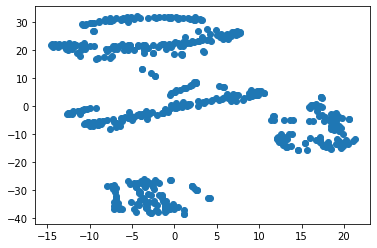

In [15]:
#Create scatter plot of t-sne
x=new_crypto[:,0]
y=new_crypto[:,1]
plt.scatter(x,y)
plt.show()

In [12]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=3, random_state=5)

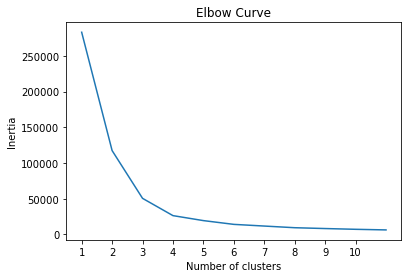

In [16]:
#finding the best k
inertia = []

# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10,11]

# calcuate the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_crypto)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendations

Based on my findings, The cryptocurrencies can be clustered together and the number of clusters according to the elbow curve is 3. The "3"is where the elbow curves on the scatter plot above.

In [18]:
#Create df with reduced dimensions
new_crypto_df=pd.DataFrame(data=new_crypto,
                        columns=["principal component 1","principal component 2"]).reset_index(drop=True)
new_crypto_df

,principal component 1,principal component 2
0,-14.397719,22.003014
1,-14.471431,21.279707
2,-2.789364,11.590340
3,-9.046142,-6.846391
4,17.230909,-12.319195
...,...,...
527,1.073953,-38.480633
528,-5.243932,21.233099
529,19.623814,-14.893422
530,17.176706,-10.971664


In [19]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=3, random_state=5)

In [20]:
# Fitting model
model.fit(new_crypto)

KMeans(n_clusters=3, random_state=5)

In [21]:
# Get predictions
predictions = model.predict(new_crypto)
print(predictions)

[1 1 1 2 2 2 1 2 2 2 0 2 1 0 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 0 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 1 0 1 1 2 2 2 2 1 2 2 0 2 1 0 1 2 2 2 1 1 1 1 1 2
 2 2 0 1 2 0 2 0 1 2 2 2 2 1 1 2 2 2 2 1 0 2 1 1 2 2 0 0 2 1 2 2 0 2 1 2 0
 2 1 1 2 2 0 2 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 0 2 2 0 2 1 2 1 1 2 2 2 2 2 1
 1 2 1 2 1 1 0 2 2 2 2 1 0 1 0 0 2 2 1 1 1 2 1 2 0 1 1 1 0 2 0 1 1 1 2 1 2
 1 1 2 1 2 0 2 1 2 1 0 1 1 2 0 0 1 0 1 2 2 0 1 2 2 1 1 0 1 1 2 0 1 1 1 1 1
 1 1 2 1 0 1 1 0 1 2 2 2 1 1 1 1 2 1 2 0 1 2 0 2 2 1 2 2 0 2 1 2 1 2 0 1 2
 0 1 1 1 1 0 1 2 0 2 0 1 1 0 2 0 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2 2 2
 0 2 1 2 1 0 1 2 0 1 2 2 2 2 1 1 2 0 0 1 2 2 2 1 2 0 2 1 1 1 1 2 1 1 2 0 1
 0 2 2 2 2 1 0 1 1 2 1 2 2 2 0 0 2 2 1 1 2 1 2 2 2 0 2 2 1 1 0 2 2 2 0 0 1
 2 2 1 2 2 2 2 0 0 2 2 2 2 2 0 1 1 0 0 2 2 2 2 1 1 1 2 0 2 0 0 1 0 2 1 0 2
 0 1 2 2 0 2 0 2 2 2 2 1 0 2 1 2 1 0 0 0 0 0 2 2 2 1 0 1 0 1 0 2 1 2 2 2 2
 0 1 0 0 2 2 0 2 1 1 2 0 2 0 2 2 1 0 2 1 2 2 0 2 2 1 2 1 2 0 1 2 0 1 1 1 1
 2 2 2 1 0 1 2 1 2 1 2 1 

In [25]:
# Add a new class column to df
new_crypto_df['class'] = model.labels_
new_crypto_df.head()

,principal component 1,principal component 2,class
0,-14.397719,22.003014,1
1,-14.471431,21.279707,1
2,-2.789364,11.590340,1
3,-9.046142,-6.846391,2
4,17.230909,-12.319195,2


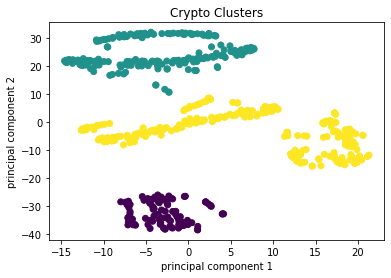

In [26]:
plt.scatter(x=new_crypto_df['principal component 1'], y=new_crypto_df['principal component 2'], 
            c=new_crypto_df['class'])
plt.title('Crypto Clusters')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()


I have above a visualization of best values of k based on the cluster analysis.